## Netflix business case: DAV project

### Problem statement: Understand the given data (by applying all the suitable tools and techniques learnt so
### far), uncover the hidden patterns / insights that can help the business and make recommendations

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
n_data=pd.read_csv('netflix_titles.csv')

In [4]:
n_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
n_data[n_data['type']=='Movie']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
movies=n_data[n_data['type']=='Movie']

In [7]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [8]:
TV_shows=n_data[n_data['type']=='TV Show']

In [9]:
TV_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   object
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      5943 non-null   object
 4   cast          5656 non-null   object
 5   country       5691 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6129 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.7+ KB


In [11]:
movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

# missing values

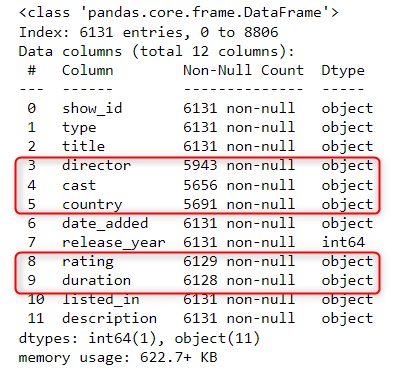
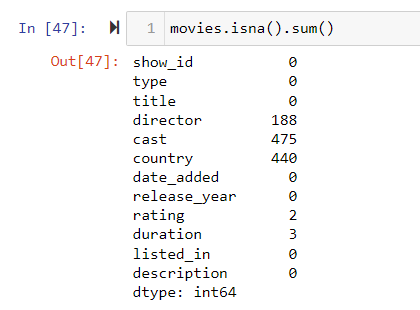

In [12]:
movies


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [13]:
m1=movies[['title','director']]

In [14]:
m1

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha"
7,Sankofa,Haile Gerima
9,The Starling,Theodore Melfi
12,Je Suis Karl,Christian Schwochow
...,...,...
8801,Zinzana,Majid Al Ansari
8802,Zodiac,David Fincher
8804,Zombieland,Ruben Fleischer
8805,Zoom,Peter Hewitt


In [15]:
movies['director'] = movies['director'].str.split(', ')

C:\Users\Dell\AppData\Local\Temp\ipykernel_9592\1981186232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['director'] = movies['director'].str.split(', ')


In [16]:
movies['country'] = movies['country'].str.split(', ')

C:\Users\Dell\AppData\Local\Temp\ipykernel_9592\3215256363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['country'] = movies['country'].str.split(', ')


In [17]:
movies['listed_in'] = movies['listed_in'].str.split(', ')

C:\Users\Dell\AppData\Local\Temp\ipykernel_9592\1270076654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['listed_in'] = movies['listed_in'].str.split(', ')


In [18]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"[Robert Cullen, José Luis Ucha]","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,[Haile Gerima],"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United Ki...","September 24, 2021",1993,TV-MA,125 min,"[Dramas, Independent Movies, International Mov...","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,[Theodore Melfi],"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",[United States],"September 24, 2021",2021,PG-13,104 min,"[Comedies, Dramas]",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,[Christian Schwochow],"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","[Germany, Czech Republic]","September 23, 2021",2021,TV-MA,127 min,"[Dramas, International Movies]",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,[Majid Al Ansari],"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","[United Arab Emirates, Jordan]","March 9, 2016",2015,TV-MA,96 min,"[Dramas, International Movies, Thrillers]",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,[David Fincher],"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",[United States],"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",[United States],"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,[Peter Hewitt],"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",[United States],"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [19]:
movies['director'].unique

<bound method Series.unique of 0                     [Kirsten Johnson]
6       [Robert Cullen, José Luis Ucha]
7                        [Haile Gerima]
9                      [Theodore Melfi]
12                [Christian Schwochow]
                     ...               
8801                  [Majid Al Ansari]
8802                    [David Fincher]
8804                  [Ruben Fleischer]
8805                     [Peter Hewitt]
8806                      [Mozez Singh]
Name: director, Length: 6131, dtype: object>

In [20]:
movies['director'].value_counts()

director
[Rajiv Chilaka]                 19
[Raúl Campos, Jan Suter]        18
[Suhas Kadav]                   16
[Marcus Raboy]                  15
[Jay Karas]                     14
                                ..
[Dennis Rovira van Boekholt]     1
[Naoto Amazutsumi]               1
[Jenny Gage]                     1
[Kaila York]                     1
[Mozez Singh]                    1
Name: count, Length: 4354, dtype: int64

In [21]:
m2=movies.explode('director')

In [22]:
m2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United Ki...","September 24, 2021",1993,TV-MA,125 min,"[Dramas, Independent Movies, International Mov...","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",[United States],"September 24, 2021",2021,PG-13,104 min,"[Comedies, Dramas]",A woman adjusting to life after a loss contend...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","[United Arab Emirates, Jordan]","March 9, 2016",2015,TV-MA,96 min,"[Dramas, International Movies, Thrillers]",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",[United States],"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",[United States],"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",[United States],"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [23]:
m3=m2.explode('country')

In [24]:
m3

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125 min,"[Dramas, Independent Movies, International Mov...","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,"September 24, 2021",1993,TV-MA,125 min,"[Dramas, Independent Movies, International Mov...","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",Jordan,"March 9, 2016",2015,TV-MA,96 min,"[Dramas, International Movies, Thrillers]",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [25]:
m4=m3.explode('listed_in')

In [26]:
m4

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [27]:
m4['cast'] = m4['cast'].str.split(', ')

In [28]:
m4.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,"September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."


In [29]:
m5=m4.explode('cast')

In [30]:
m5

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [31]:
m5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145843 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       145843 non-null  object
 1   type          145843 non-null  object
 2   title         145843 non-null  object
 3   director      144558 non-null  object
 4   cast          144515 non-null  object
 5   country       139644 non-null  object
 6   date_added    145843 non-null  object
 7   release_year  145843 non-null  int64 
 8   rating        145834 non-null  object
 9   duration      145840 non-null  object
 10  listed_in     145843 non-null  object
 11  description   145843 non-null  object
dtypes: int64(1), object(11)
memory usage: 14.5+ MB


In [32]:
m5.isna().sum()

show_id            0
type               0
title              0
director        1285
cast            1328
country         6199
date_added         0
release_year       0
rating             9
duration           3
listed_in          0
description        0
dtype: int64

In [33]:
m5['director'].isna().sum()

1285

In [34]:
m5['director'].fillna('unknown',inplace=True)

In [35]:
m5['director'].isna().sum()

0

In [36]:
m5['cast'].isna().sum()

1328

In [37]:
m5['cast'].fillna('unknown',inplace=True)

In [38]:
m5['cast'].isna().sum()

0

In [39]:
m5['country'].isna().sum()

6199

In [40]:
m5['country'].fillna('unknown',inplace=True)

In [41]:
m5['country'].isna().sum()

0

In [42]:
m5.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          9
duration        3
listed_in       0
description     0
dtype: int64

### ratings are missing for 9 records ( actually 2 movies), duration is missing for 3 records (movies); overall(2+3=5 out of 6131 movies; 5/6131 = 0.08% : can be safely dropped from the dataset. 


In [43]:
m5.dropna(inplace=True)

In [44]:
m5.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [45]:
m5

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [46]:
m5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145831 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       145831 non-null  object
 1   type          145831 non-null  object
 2   title         145831 non-null  object
 3   director      145831 non-null  object
 4   cast          145831 non-null  object
 5   country       145831 non-null  object
 6   date_added    145831 non-null  object
 7   release_year  145831 non-null  int64 
 8   rating        145831 non-null  object
 9   duration      145831 non-null  object
 10  listed_in     145831 non-null  object
 11  description   145831 non-null  object
dtypes: int64(1), object(11)
memory usage: 14.5+ MB


In [47]:
m5['duration']=m5['duration'].str.split(' ')

In [48]:
m5

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,"[90, min]",Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,unknown,"September 24, 2021",2021,PG,"[91, min]",Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,unknown,"September 24, 2021",2021,PG,"[91, min]",Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,unknown,"September 24, 2021",2021,PG,"[91, min]",Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,unknown,"September 24, 2021",2021,PG,"[91, min]",Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,"[111, min]",Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,"[111, min]",Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,"[111, min]",Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,"[111, min]",Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [49]:
m5['duration']=m5['duration'].apply(lambda x: x[0])

In [50]:
m5

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [51]:
m5['duration'][0]

'90'

In [52]:
m5['duration']=m5['duration'].apply(lambda x: int(x))

In [53]:
m5

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [54]:
m5['duration'][0]

90

In [55]:
m5['duration'].mean()

106.85701942659654

In [56]:
m5.groupby('title')['title'].count()

title
#Alive                            6
#AnneFrank - Parallel Stories     8
#FriendButMarried                24
#FriendButMarried 2              24
#Roxy                            16
                                 ..
​Maj Rati ​​Keteki               16
​Mayurakshi                      12
​​Kuch Bheege Alfaaz             24
반드시 잡는다                           3
최강전사 미니특공대 : 영웅의 탄생               6
Name: title, Length: 6126, dtype: int64

In [57]:
duplicates=m5[m5.duplicated()]

In [58]:
duplicates

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1631,s1632,Movie,Rust Creek,Jen McGowan,Micah Hauptman,United States,"November 30, 2020",2018,R,108,Thrillers,A wrong turn in the woods becomes a fight for ...
3718,s3719,Movie,Blood Will Tell,Miguel Cohan,Oscar Martínez,Argentina,"June 21, 2019",2019,TV-MA,113,Dramas,Family patriarch Elías begins to unravel after...
3718,s3719,Movie,Blood Will Tell,Miguel Cohan,Dolores Fonzi,Argentina,"June 21, 2019",2019,TV-MA,113,Dramas,Family patriarch Elías begins to unravel after...
3718,s3719,Movie,Blood Will Tell,Miguel Cohan,Diego Velázquez,Argentina,"June 21, 2019",2019,TV-MA,113,Dramas,Family patriarch Elías begins to unravel after...
3718,s3719,Movie,Blood Will Tell,Miguel Cohan,Paulina Garcia,Argentina,"June 21, 2019",2019,TV-MA,113,Dramas,Family patriarch Elías begins to unravel after...
3718,s3719,Movie,Blood Will Tell,Miguel Cohan,Luis Gnecco,Argentina,"June 21, 2019",2019,TV-MA,113,Dramas,Family patriarch Elías begins to unravel after...
3718,s3719,Movie,Blood Will Tell,Miguel Cohan,Malena Sánchez,Argentina,"June 21, 2019",2019,TV-MA,113,Dramas,Family patriarch Elías begins to unravel after...
3718,s3719,Movie,Blood Will Tell,Miguel Cohan,Emilio Vodanovich,Argentina,"June 21, 2019",2019,TV-MA,113,Dramas,Family patriarch Elías begins to unravel after...
3718,s3719,Movie,Blood Will Tell,Miguel Cohan,Norman Briski,Argentina,"June 21, 2019",2019,TV-MA,113,Dramas,Family patriarch Elías begins to unravel after...
3718,s3719,Movie,Blood Will Tell,Miguel Cohan,Oscar Martínez,Argentina,"June 21, 2019",2019,TV-MA,113,Independent Movies,Family patriarch Elías begins to unravel after...


In [59]:
m6=m5.drop_duplicates()

In [60]:
m6.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [61]:
m6['date_added']=pd.to_datetime(m6['date_added'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_9592\549994981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m6['date_added']=pd.to_datetime(m6['date_added'])


In [62]:
m6

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [63]:
m6.groupby(['country','title'])['title'].count()

country      title                      
             Eyes of a Thief                24
Afghanistan  The Land of the Enlightened     2
Albania      Forgive Us Our Debts            8
Algeria      Alexandria ... Why?            33
             DNA                            20
                                            ..
unknown      You vs. Wild: Out Cold          2
             Your Excellency                34
             Zero Hour                      16
             Zulu Man in Japan               3
             최강전사 미니특공대 : 영웅의 탄생             6
Name: title, Length: 7809, dtype: int64

In [64]:
m7_country=m6.groupby(['country','title'])['country'].count()

In [65]:
# m7_country.to_excel('m7_countries.xlsx')

In [66]:
directors=m6[['show_id','director']].drop_duplicates(keep = 'first')['director'].value_counts()

In [67]:
directors

director
unknown              187
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Suhas Kadav           16
                    ... 
Vrinda Samartha        1
Nicholaus Goossen      1
Stig Bergqvist         1
Paul Demeyer           1
Mozez Singh            1
Name: count, Length: 4776, dtype: int64

In [68]:
m6.groupby('cast')['show_id'].nunique().sort_values(ascending=False).head(10)

cast
unknown             475
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     32
Om Puri              30
Akshay Kumar         30
Amitabh Bachchan     28
Julie Tejwani        28
Paresh Rawal         28
Rupa Bhimani         27
Name: show_id, dtype: int64

In [69]:
m6.groupby('country')['show_id'].nunique().sort_values(ascending=False).head(10)

country
United States     2748
India              962
United Kingdom     532
unknown            439
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Name: show_id, dtype: int64

In [70]:
m6.groupby('listed_in')['show_id'].nunique().sort_values(ascending=False).head(10)

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: show_id, dtype: int64

In [71]:
m6.groupby('director')['show_id'].nunique().sort_values(ascending=False).head(10)

director
unknown                187
Rajiv Chilaka           22
Jan Suter               21
Raúl Campos             19
Suhas Kadav             16
Marcus Raboy            15
Jay Karas               15
Cathy Garcia-Molina     13
Youssef Chahine         12
Martin Scorsese         12
Name: show_id, dtype: int64

In [72]:
# m6.to_excel('m6_clean.xlsx')

In [73]:
cast_data=m6.groupby('cast')['show_id'].nunique().sort_values(ascending=False)

In [74]:
country_data=m6.groupby('country')['show_id'].nunique().sort_values(ascending=False)

In [75]:
genre_data=m6.groupby('listed_in')['show_id'].nunique().sort_values(ascending=False)

In [76]:
director_data=m6.groupby('director')['show_id'].nunique().sort_values(ascending=False)

In [77]:
cast=cast_data.head(10)

In [78]:
country=country_data.head(10)

In [79]:
genre=genre_data.head(10)

In [80]:
director=director_data.head(10)

In [81]:
# cast_data.to_excel('m6_cast_data_01.xlsx')
# country_data.to_excel('m6_country_data_01.xlsx')
# genre_data.to_excel('m6_genre_data_01.xlsx')
# director_data.to_excel('m6_director_data_01.xlsx')

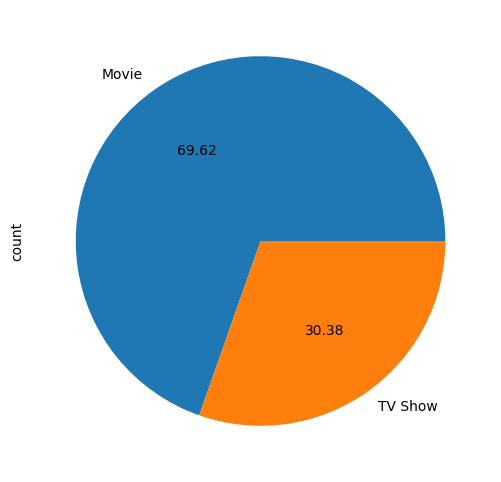

In [82]:
plt.figure(figsize=(8,6))
n_data['type'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [83]:
cast

cast
unknown             475
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     32
Om Puri              30
Akshay Kumar         30
Amitabh Bachchan     28
Julie Tejwani        28
Paresh Rawal         28
Rupa Bhimani         27
Name: show_id, dtype: int64

In [84]:
cast_01=cast[1:]

In [85]:
cast_01


cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Amitabh Bachchan    28
Julie Tejwani       28
Paresh Rawal        28
Rupa Bhimani        27
Name: show_id, dtype: int64

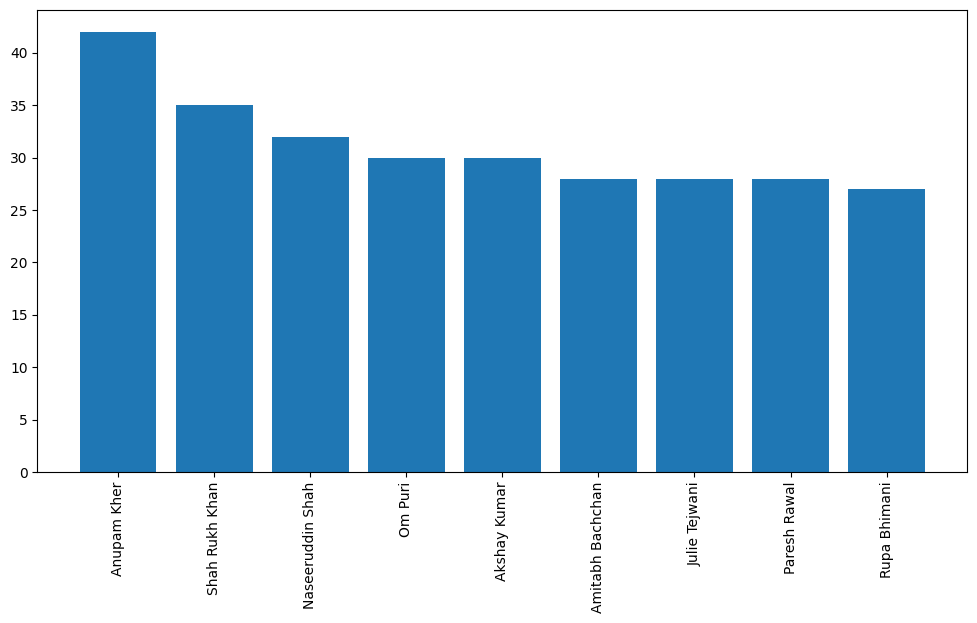

In [86]:
plt.figure(figsize=(12,6))
plt.bar(cast_01.index,cast_01)
plt.xticks(rotation=90)
plt.show()

In [87]:
country

country
United States     2748
India              962
United Kingdom     532
unknown            439
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Name: show_id, dtype: int64

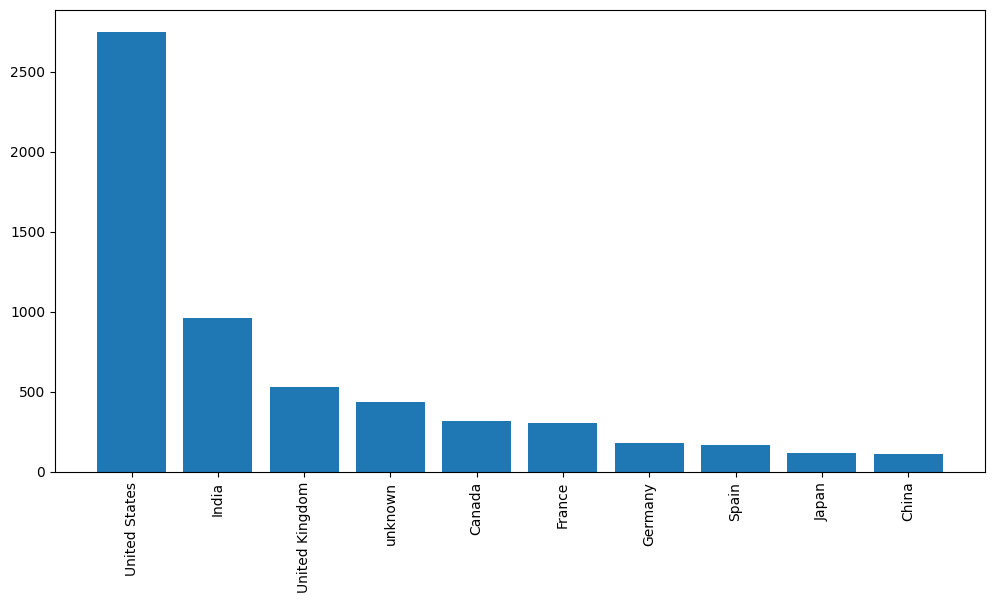

In [88]:
plt.figure(figsize=(12,6))
plt.bar(country.index,country)
plt.xticks(rotation=90)
plt.show()

In [89]:
genre

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: show_id, dtype: int64

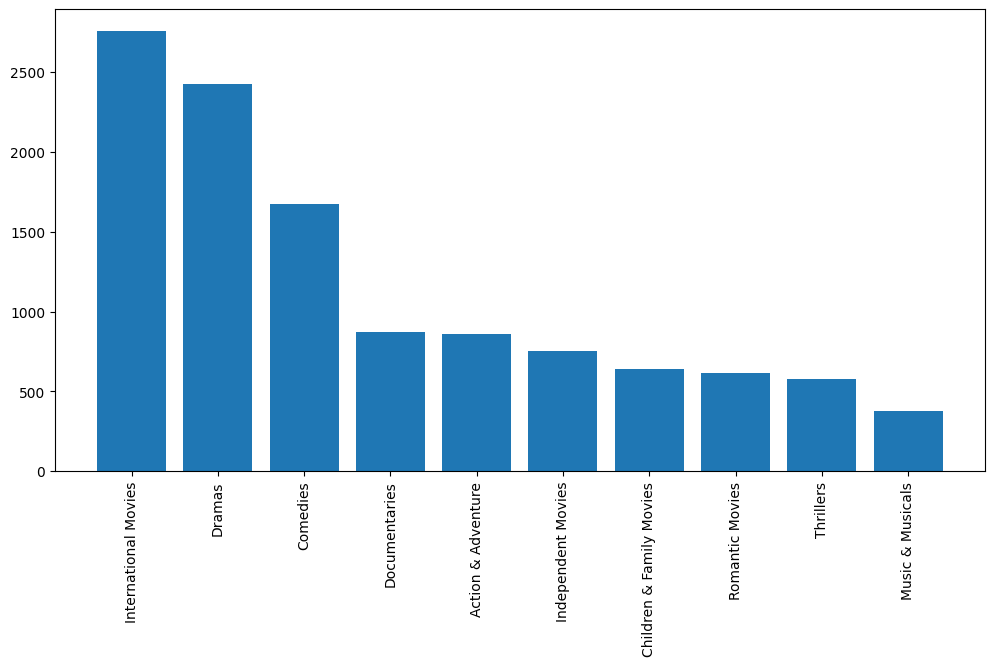

In [90]:
plt.figure(figsize=(12,6))
plt.bar(genre.index,genre)
plt.xticks(rotation=90)
plt.show()

In [91]:
director

director
unknown                187
Rajiv Chilaka           22
Jan Suter               21
Raúl Campos             19
Suhas Kadav             16
Marcus Raboy            15
Jay Karas               15
Cathy Garcia-Molina     13
Youssef Chahine         12
Martin Scorsese         12
Name: show_id, dtype: int64

In [92]:
director=director[1:]

In [93]:
director

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Name: show_id, dtype: int64

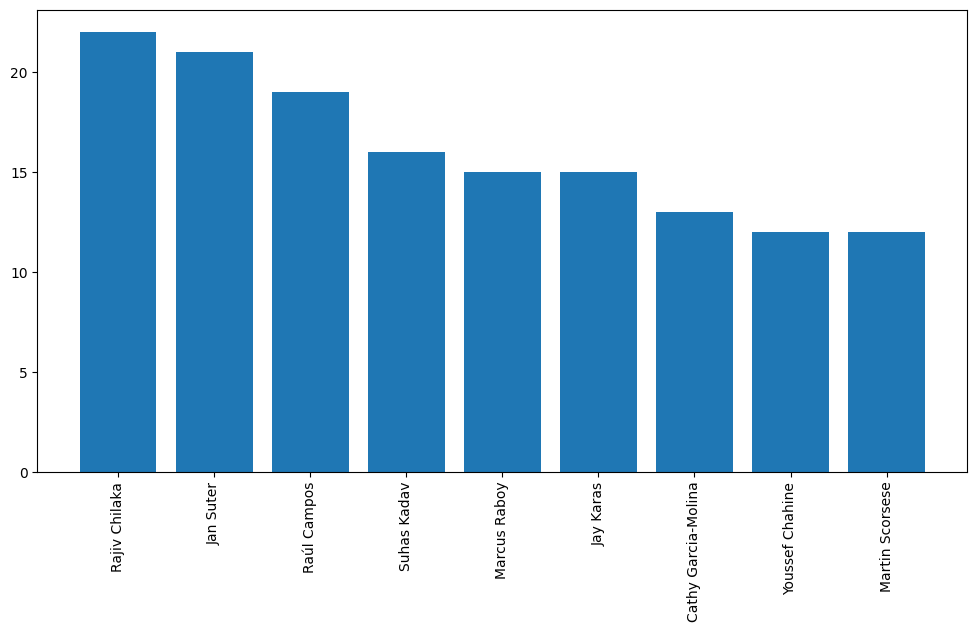

In [94]:
plt.figure(figsize=(12,6))
plt.bar(director.index,director)
plt.xticks(rotation=90)
plt.show()

In [95]:
director_cast_data=m6.groupby(['cast','director'])['show_id'].nunique().sort_values(ascending=False)

In [96]:
m6.groupby(['cast','director'])['show_id'].nunique().sort_values(ascending=False).head(30)

cast                director           
unknown             unknown                54
Rajesh Kava         Rajiv Chilaka          19
Julie Tejwani       Rajiv Chilaka          19
Rupa Bhimani        Rajiv Chilaka          18
Jigna Bhardwaj      Rajiv Chilaka          18
Vatsal Dubey        Rajiv Chilaka          16
Swapnil             Rajiv Chilaka          13
Mousam              Rajiv Chilaka          13
Fortune Feimster    unknown                11
David Spade         unknown                11
London Hughes       unknown                10
Saurav Chakraborty  Suhas Kadav             8
Tamannaah Bhatia    S.S. Rajamouli          7
Rana Daggubati      S.S. Rajamouli          7
Sathyaraj           S.S. Rajamouli          7
Prabhas             S.S. Rajamouli          7
Kumiko Watanabe     Toshiya Shinohara       7
Koji Tsujitani      Toshiya Shinohara       7
Houko Kuwashima     Toshiya Shinohara       7
Kappei Yamaguchi    Toshiya Shinohara       7
Satsuki Yukino      Toshiya Shinohara   

In [97]:
# director_cast=m6.groupby(['cast','director'])['show_id'].nunique().sort_values(ascending=False).head(30)

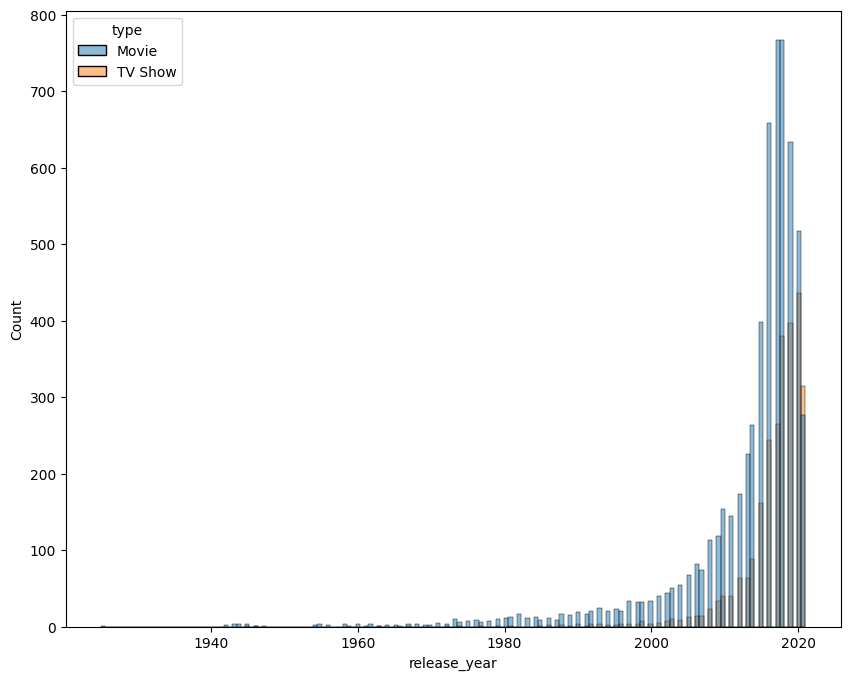

In [98]:
plt.figure(figsize=(10,8))
sns.histplot(x='release_year',hue='type',data=n_data)
plt.show()

## TV shows are increasingly becoming more and more prominant in the recent past

## in the coming future TV shows may become major "Entertainment" medium


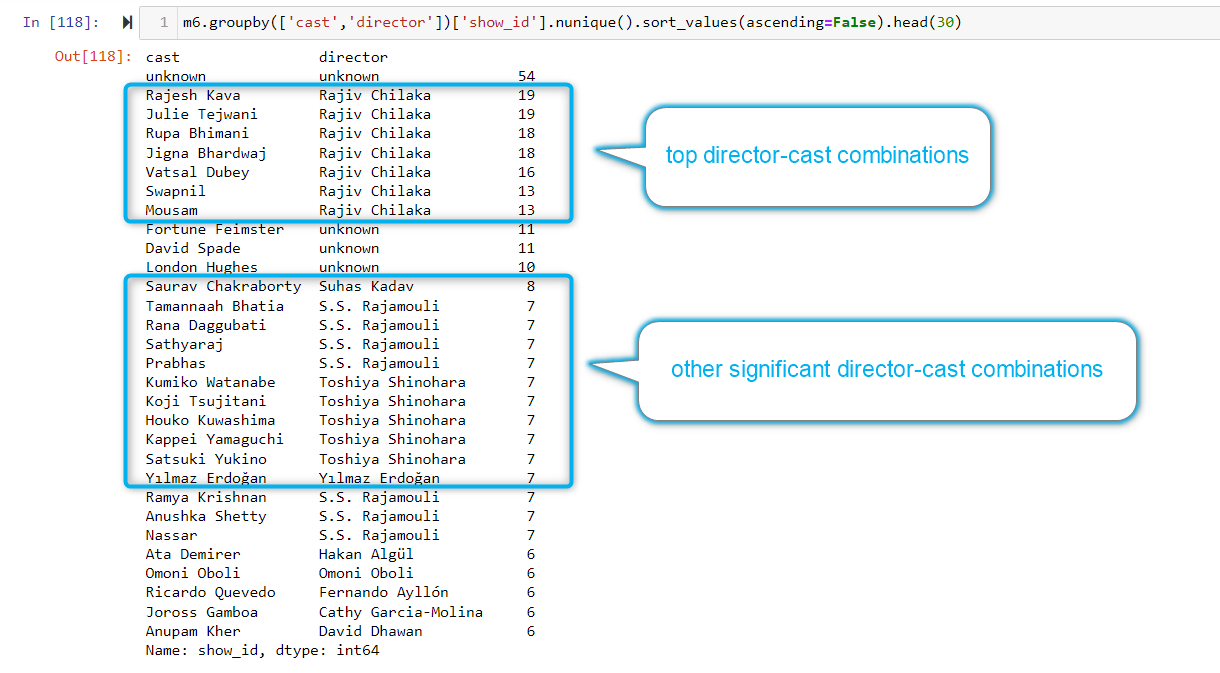

## tv shows charts

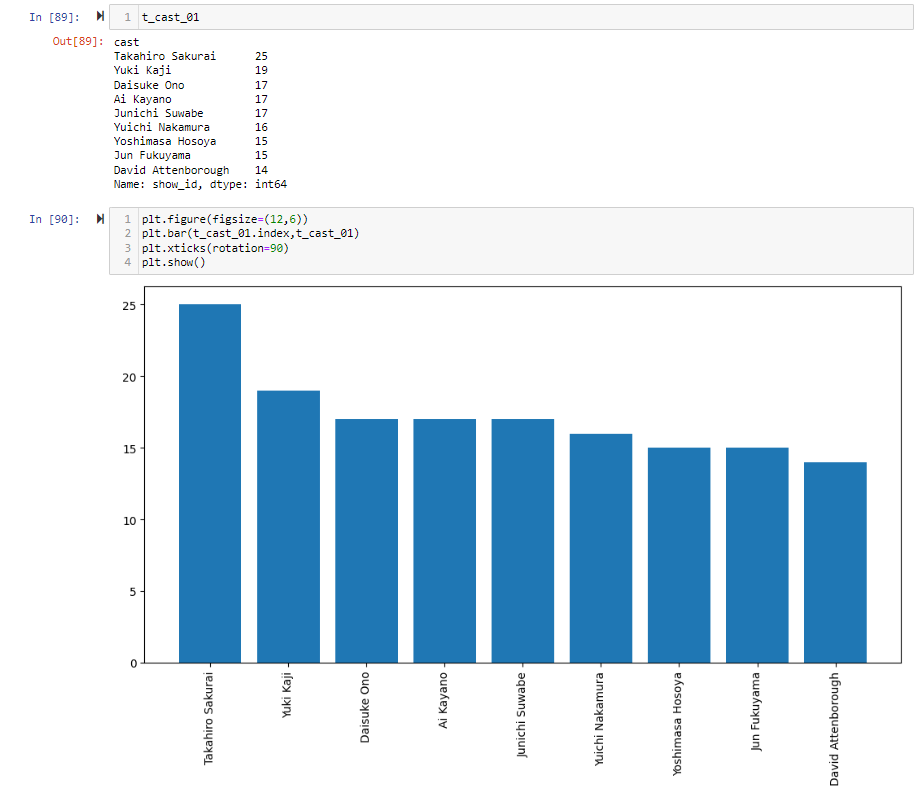

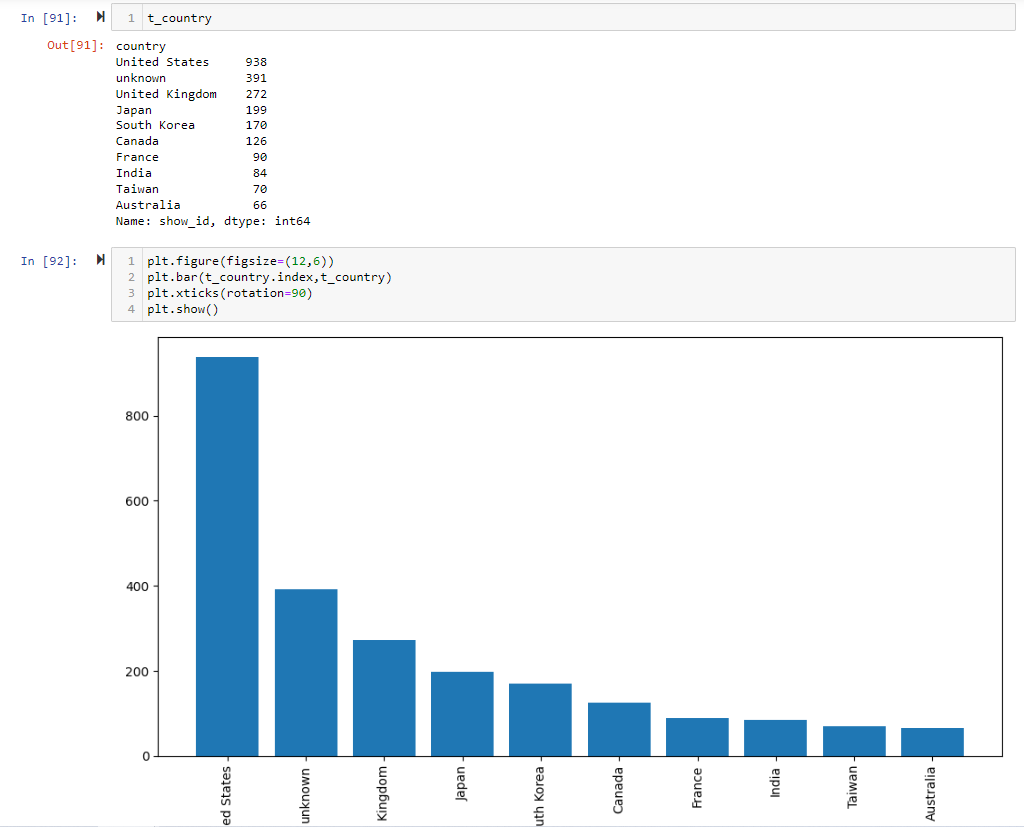

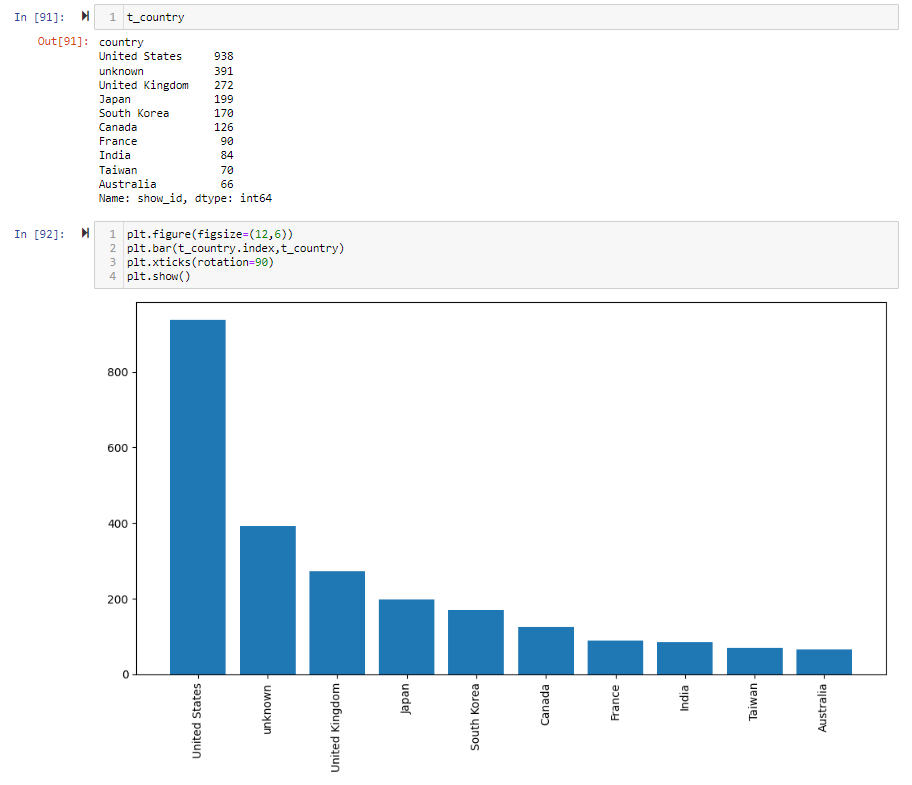

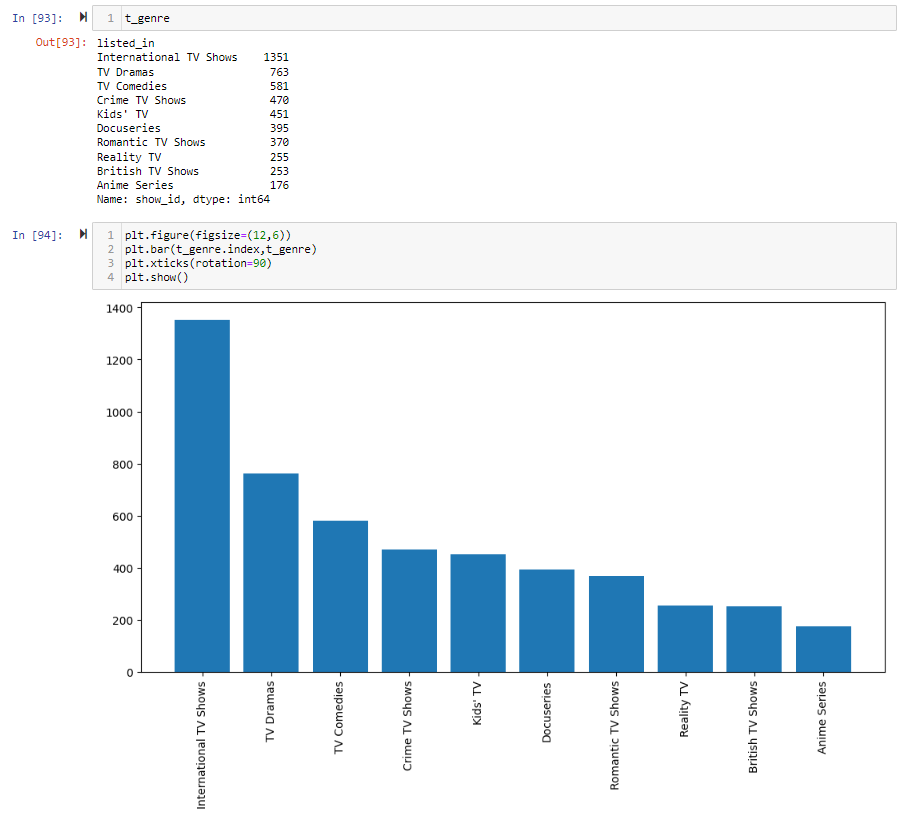

## Analysis using excel

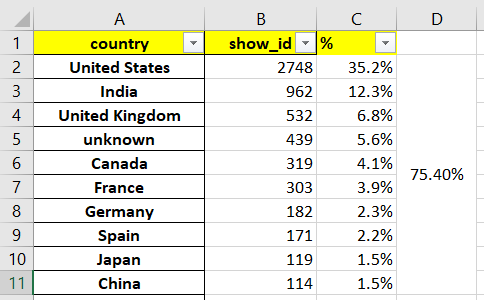


### The above snap shows top 10 countries (out of 123 countries) in movie production.... accounting for more 
### than 75% of world movie production.

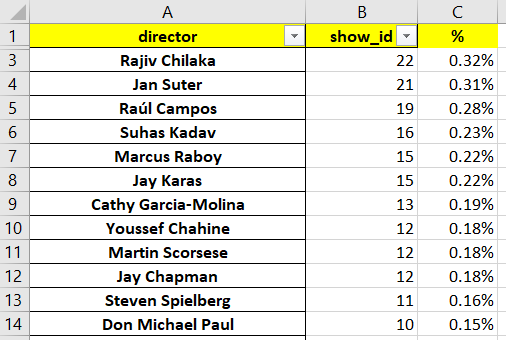

### Directors who have directed 10 or more movies (the above snap)

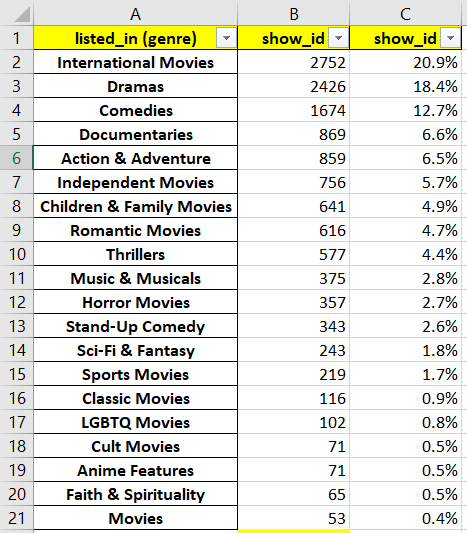

### genres and their share in percentage (snap above). Interesting to note that drama and documentaries are 
### above action & adventure, Romantic,Thrillers, Horror and even sci-fi genres

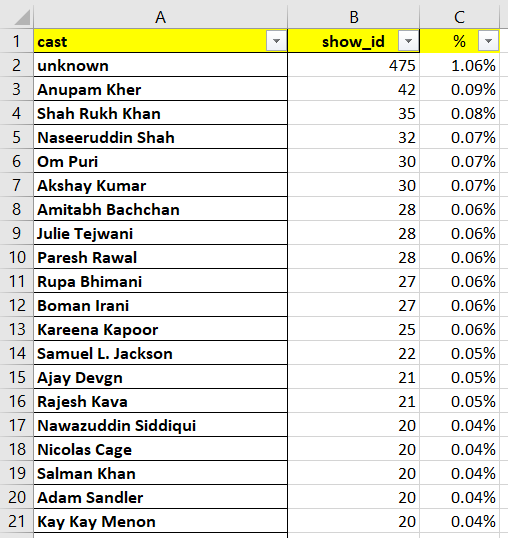

### Top 20 actors (snap above). unknown is actually NaN, could not impute with appropriate mode of genre 
###  group or country group... something was going wrong and randon values were getting imputed... so 
###  eventually imputed them as "unknown". 

### Recommendations: 
###  1. USA and India dominate the movies category where as USA, UK, Japan, South Korea, Canada dominate 
###       TV show production (since viewership data is not available, not able to make any business 
###        recommendation)
###  2. TV shows are becoming more and more dominant category in the recent past. Probably this trend  may 
###       continue in the future...
###  3. "International" is the major genre in both movies and TV shows... This trend may also continue in the 
###        future